In [69]:
import pandas as pd

In [70]:
df = pd.read_excel('../Data/boston.xlsx')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Column 설명
- CRIM: 지역별 범죄 발생률
- ZN: 25,000 평방피트를 초과하는 거주 지역의 비율
- INDUS: 비상업 지역 넓이 비율
- CHAS: 찰스강에 대한 더미 변숙(강의 경계에 위치한 경우는 1, 아니면 0)
- NOX: 일산화질소 농도
- RM: 거주할 수 있는 방의 수
- AGE: 1940년 이전에 건축된 주택의 비율
- DIS: 5개의 보스턴 고용센터까지의 가중치 거리
- RAD: 고속도로 접근 용이도
- TAX: 10,000 달러당 재산 세율
- PTRATIO: 지역의 교사와 학생 비율
- B: 지역의 흑인 인구 비율
- LSTAT: 하위 계층의 비율
- PRICE: 본인 소유의 주택 가격(중앙값)

In [71]:
# 데이터셋 크기
df.shape

(506, 14)

In [72]:
# 기본 통계량
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


> mean과 50% 값이 차이가 많이 나는 것과 차이가 별로 없는 것을 구분할 수 있어야 함

### 상관 관계 분석

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# 상관 관계 행렬
df_corr = df.corr()
df_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


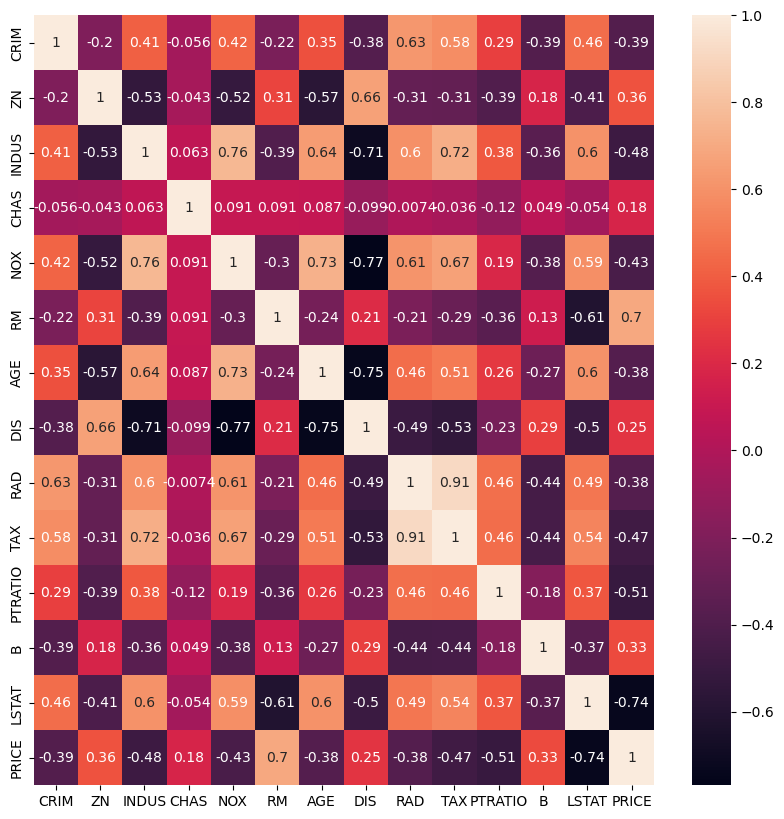

In [75]:
# 히트맵
plt.figure(figsize=(10, 10))
sns.heatmap(
    df_corr,
    annot=True,
    cbar=True
)

plt.show()

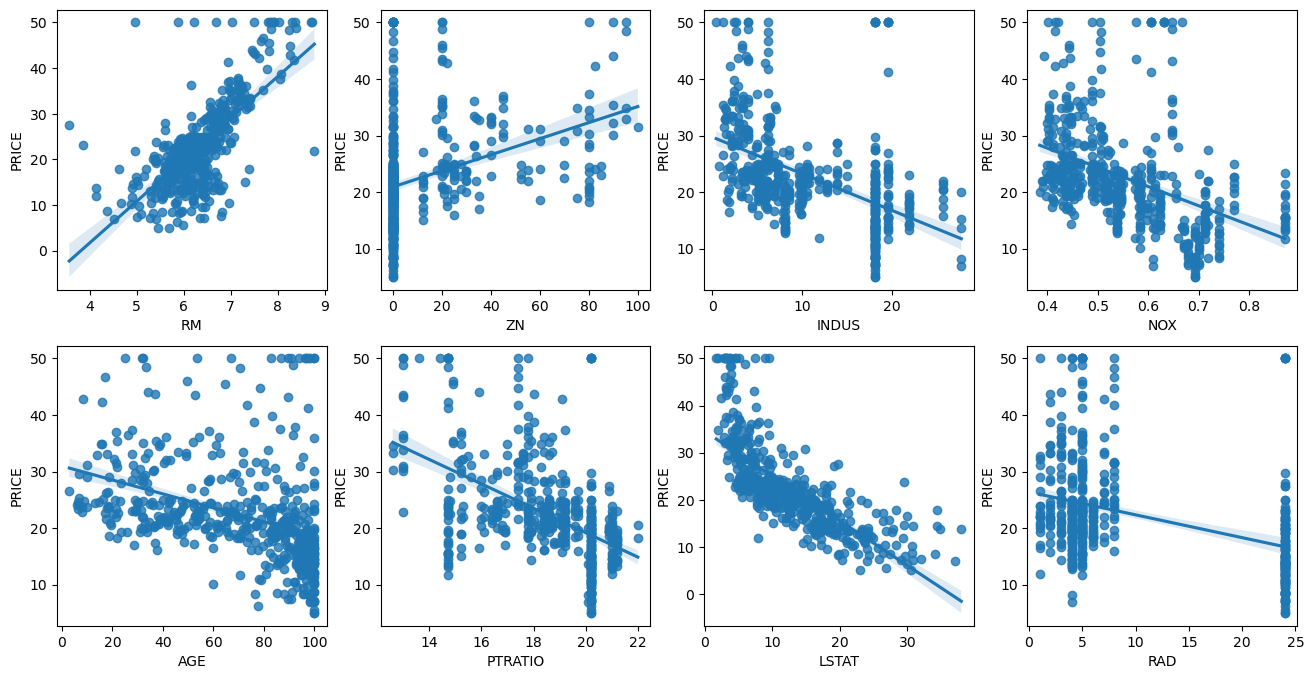

In [76]:
# PRICE와 각 컬럼의 회귀 직선
# 2 X 4 subplots 이용
fig, axs = plt.subplots(
    figsize=(16, 8),
    ncols=4,
    nrows=2
)

lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']

for i, feature in enumerate(lm_features):
    row = int(i/4) # row 수(0과 1)
    col = i % 4
    sns.regplot(
        x=feature,
        y='PRICE',
        data=df,
        ax=axs[row][col]
    )

> 집값 상승과 상관관계 best: RM(방갯수)  
> 집값 하락과 상관관계 best: LSTAT(하위 계층 비율)

---
### 선형회귀 모델로 예측

In [77]:
# Feature와 Target으로 분리
y_target = df['PRICE']
X_data = df.drop(['PRICE'], axis='columns')

In [78]:
print(y_target.shape)
print(X_data.shape)

(506,)
(506, 13)


In [79]:
# Train과 Test
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X_data,
    y_target,
    test_size=0.3,
    random_state=42
)

In [81]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
lr = LinearRegression()

In [84]:
lr.fit(X_train, y_train)

LinearRegression()

In [85]:
pred = lr.predict(X_test)
pred[:5]

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988])

### 평가전에 예측값과 정답을 그래프로 확인

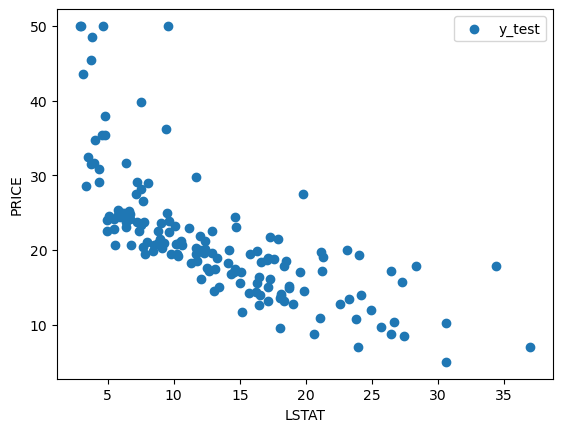

In [86]:
# LSTA와 PRICE의 그래프를 이용해 예측값 출력
plt.scatter(
    X_test['LSTAT'],
    y_test,
    label = 'y_test'
)

plt.xlabel('LSTAT')
plt.ylabel('PRICE')
plt.legend(loc='best')
plt.show()

### 평가
- MSE(Mean Square Error): 평균 제곱 오차
- RMSE(Root Mean Square Error): 평균 제곱근 오차

In [87]:
from sklearn.metrics import mean_squared_error, r2_score # 선형회귀모델 적합도: 분산값, 1에 가까울수록 적합도 높다
import numpy as np

In [88]:
# RMSE를 이용한 평가
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Score: {r2_score(y_test, pred):.3f}')

MSE: 21.517, RMSE: 4.639
Score: 0.711


> score는 1에 가까울 수록 좋은 점수다.  
약 71점이고 오차는 4.6달러 정도이다.

In [89]:
# 절편값 확인하기
print('절편값:', lr.intercept_)

절편값: 31.631084035693046


In [90]:
# 회귀 계수: 독립 변수의 영향에 따라 종속변수에 미치는 영향력 크기
print('회귀계수:', np.round(lr.coef_, 1))

회귀계수: [ -0.1   0.    0.    3.1 -15.4   4.1  -0.   -1.4   0.2  -0.   -0.9   0.
  -0.5]


In [91]:
# 회귀 계수 정렬(내림차순)
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          4.1
CHAS        3.1
RAD         0.2
ZN          0.0
INDUS       0.0
AGE        -0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -0.9
DIS        -1.4
NOX       -15.4
dtype: float64

> RM이 양의 절대값이 제일 크다.  
NOX가 음의 절대값이 너무 크다.

---
### Cross Validation 적용

In [92]:
from sklearn.model_selection import cross_val_score

In [93]:
# Cross Validation: 5 folds의 개별 Negative MSE Scores
# NMSE: 음수로 만들어 작은 오류값이 더 큰 숫자로 인식됨.
neg_mse_scores = cross_val_score(
    lr,
    X_data,
    y_target,
    scoring='neg_mean_squared_error',
    cv=5
)

neg_mse_scores


array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [94]:
# RMSE를 구하기 위해 mse 값에 -1을 곱하고 평균을 내면 된다.
rmse_scores = np.sqrt(-1*neg_mse_scores)
rmse_scores

array([3.52991509, 5.10378498, 5.75101191, 8.9867887 , 5.77179405])

In [95]:
# 5 fold의 평균 RMSE
np.mean(rmse_scores)

5.8286589462158265

### 1. 회귀식 계수가 양수인 컬럼만으로 예측
RM          4.1  
CHAS        3.1  
RAD         0.2  
ZN          0.0  
INDUS       0.0  
AGE        -0.0  
TAX        -0.0  
B           0.0  
CRIM       -0.1  
LSTAT      -0.5  
PTRATIO    -0.9  
DIS        -1.4  
NOX       -15.4

In [96]:
# DataSet 만들기 (양수만)
tempCol = ['RM', 'CHAS', 'RAD', 'ZN', 'INDUS', 'B', 'PRICE']
df2 = df.loc[:, tempCol]

y_target = df['PRICE']
X_data = df2.drop(['PRICE'], axis='columns')

X_train, X_test, y_train, y_test = train_test_split(
    X_data,
    y_target,
    test_size=0.3,
    random_state=42
)

lr = LinearRegression()
neg_mse_scores = cross_val_score(
    lr,
    X_data,
    y_target,
    scoring='neg_mean_squared_error',
    cv=5
)

rmse_scores = np.sqrt(-1*neg_mse_scores)
print('평균:', np.mean(rmse_scores))


평균: 6.754067139638545


### 2. 회귀식 계수가 음수인 컬럼만으로 예측


In [97]:
# DataSet 만들기 (음수만)
tempCol = ['AGE', 'TAX', 'CRIM', 'LSTAT', 'PTRATIO', 'DIS', 'NOX', 'PRICE']
df2 = df.loc[:, tempCol]

y_target = df['PRICE']
X_data = df2.drop(['PRICE'], axis='columns')

X_train, X_test, y_train, y_test = train_test_split(
    X_data,
    y_target,
    test_size=0.3,
    random_state=42
)

lr = LinearRegression()
neg_mse_scores = cross_val_score(
    lr,
    X_data,
    y_target,
    scoring='neg_mean_squared_error',
    cv=5
)

rmse_scores = np.sqrt(-1*neg_mse_scores)
print('평균:', np.mean(rmse_scores))


평균: 5.736165690896388


#### 회귀식 계수가 0인 부분 제외

In [98]:
# DataSet 만들기 (음수만)
tempCol = ['RM', 'CHAS', 'RAD', 'CRIM', 'LSTAT', 'PTRATIO', 'DIS', 'NOX', 'PRICE']
df2 = df.loc[:, tempCol]

y_target = df['PRICE']
X_data = df2.drop(['PRICE'], axis='columns')

X_train, X_test, y_train, y_test = train_test_split(
    X_data,
    y_target,
    test_size=0.3,
    random_state=42
)

lr = LinearRegression()
neg_mse_scores = cross_val_score(
    lr,
    X_data,
    y_target,
    scoring='neg_mean_squared_error',
    cv=5
)

rmse_scores = np.sqrt(-1*neg_mse_scores)
print('평균:', np.mean(rmse_scores))


평균: 5.741673131363346


### 회귀식 계수가 음수인 것 중 0인 부분 제외

In [99]:
# DataSet 만들기 (음수만)
tempCol = ['CRIM', 'LSTAT', 'PTRATIO', 'DIS', 'NOX', 'PRICE']
df2 = df.loc[:, tempCol]

y_target = df['PRICE']
X_data = df2.drop(['PRICE'], axis='columns')

X_train, X_test, y_train, y_test = train_test_split(
    X_data,
    y_target,
    test_size=0.3,
    random_state=42
)

lr = LinearRegression()
neg_mse_scores = cross_val_score(
    lr,
    X_data,
    y_target,
    scoring='neg_mean_squared_error',
    cv=5
)

rmse_scores = np.sqrt(-1*neg_mse_scores)
print('평균:', np.mean(rmse_scores))


평균: 5.7028824566818885
